Воспользуемся jupyter notebook

In [1]:
import pandas as pd
df = pd.read_csv('task_about_time.tsv', sep='\t')
df.head()

,worker,project_id,task_id,resolution_type,start_ts,end_ts
0,login1,1,task_1,resolution_1,1576865064,1576867011
1,login1,2,task_2,resolution_1,1576837986,1576838385
2,login1,1,task_3,resolution_1,1576078746,1576079378
3,login1,1,task_4,resolution_2,1576504430,1576504564
4,login1,1,task_5,resolution_1,1575398193,1575398809


Добавим столбец затраченного времени на задание - diff

In [2]:
df['diff'] = df['end_ts'] - df['start_ts']

Посмотрим как распределены задания по проектам и какое медианное время выполнения заданий в них

In [3]:
df.groupby(['project_id','resolution_type']).median()

start_ts        end_ts   diff
project_id resolution_type                                   
1          resolution_1     1.576009e+09  1.576009e+09  579.0
           resolution_2     1.575737e+09  1.575737e+09   55.0
2          resolution_1     1.576059e+09  1.576061e+09  568.0
           resolution_2     1.575991e+09  1.575991e+09   50.5

In [4]:
df.groupby(['project_id','resolution_type']).count()

worker  task_id  start_ts  end_ts  diff
project_id resolution_type                                         
1          resolution_1       3375     3375      3375    3375  3375
           resolution_2        366      366       366     366   366
2          resolution_1       1151     1151      1151    1151  1151
           resolution_2         56       56        56      56    56

Хотя по данным видно, что на резолюцию 2 ассесоры тратят менеше времени, мы будет платить за все задания в одном проекте  одинаково. Исходя из того, что такие задания ассесоры сами не выбирают, а они попадаются случайно.

Так как мы знаем, что проекты разные, то размер оплаты за задание будем расчитывать отдельно для каждого.

In [5]:
clms = ['worker', 'resolution_type', 'diff']
p1_df = df[df['project_id'] == 1][clms]
p2_df = df[df['project_id'] == 2][clms]

Проделаем все операции сначала для 1 проекта, потом аналоггично для второго

Уберем шумы по 2.5% от правой и левой границы и вычисляем медиану времени выполнения задания в проекте

In [6]:
n1 = int(len(df)*0.025)
n2 = int(len(df)*0.975)
median_time_p1 = p1_df.sort_values(by=['diff'])[n1:n2].median()
median_time_p1

diff    552.5
dtype: float64

Теперь построим гистаграмму и найдем медиану графическим путем 

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib

Using matplotlib backend: Qt5Agg


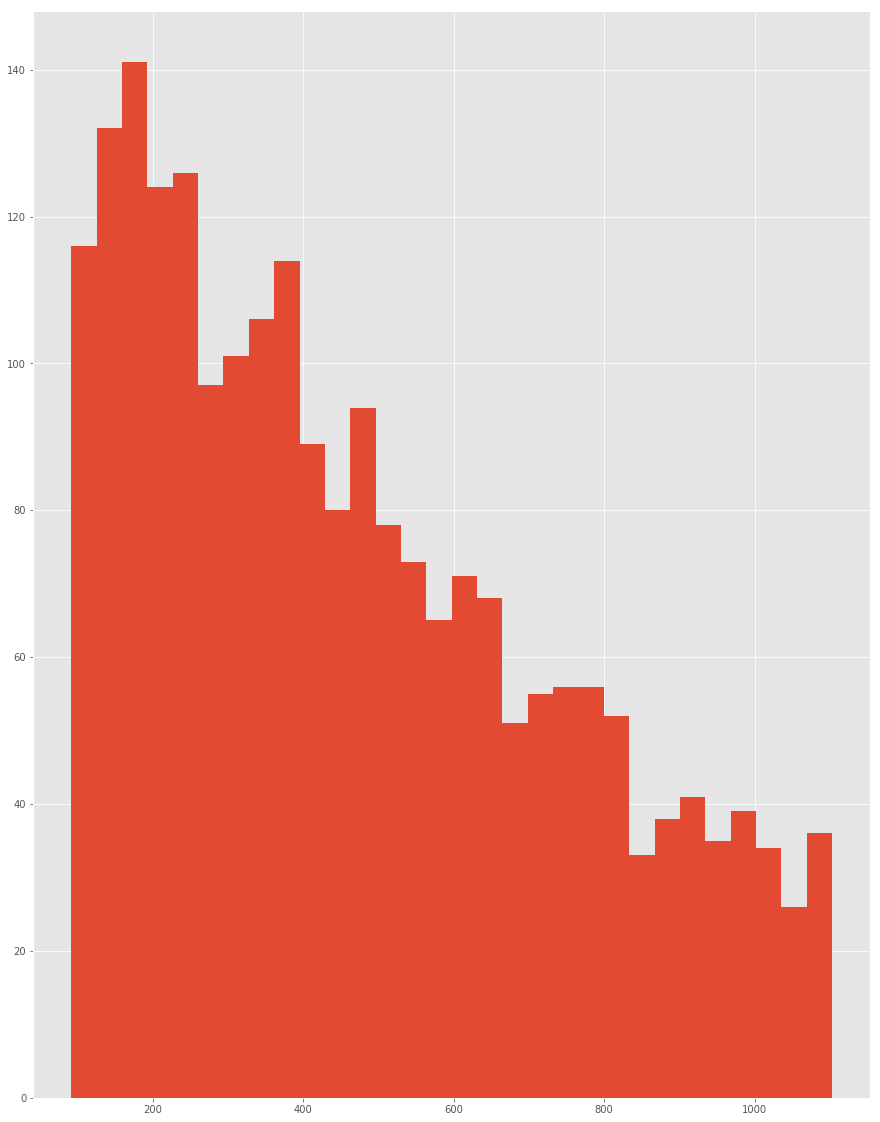

In [11]:
fig = plt.figure(figsize =(15,20))
ax = fig.gca()
p1_df = p1_df.sort_values(by=['diff'])[n1:n2]
p1_df[p1_df['diff']<int(2*median_time_p1)]['diff'].hist(bins = 30,ax = ax)

Видим, что медиана из гестограммы примерно равна 300.
Будет справедливо, если взять среднее между посчитанным на всей выборке и наблюдаемым на гистаграмме.
И это будет медианное время виполнения задания. 

In [12]:
avg_ts_p1 = (median_time_p1 + 300) / 2
avg_ts_p1

diff    426.25
dtype: float64

Зафиксируем произвольное N и расчитаем оплату за задание в проекте 1

In [13]:
N = 5
pay_p1 = int(avg_ts_p1 / 30 * N)
pay_p1

71

Расчитаем для всех ассесоров оплату за 1 проект

In [14]:
t1 = p1_df.groupby(['worker']).count()
t1['pay_p1'] = t1['diff'] * pay_p1
t1

,resolution_type,diff,pay_p1
worker,,,
login1,151,151,10721
login10,82,82,5822
login11,291,291,20661
login12,192,192,13632
login13,271,271,19241
login14,73,73,5183
login15,166,166,11786
login16,476,476,33796
login2,24,24,1704


Теперь все те же действия проделываем для проекта 2

Уберем шумы по 2.5% от правой и левой границы и вычисляем медиану времени выполнения задания в проекте

In [15]:
median_time_p2 = p2_df.sort_values(by=['diff'])[n1:n2].median()
median_time_p2

diff    610.5
dtype: float64

Теперь построим гистаграмму и посмотрим, где

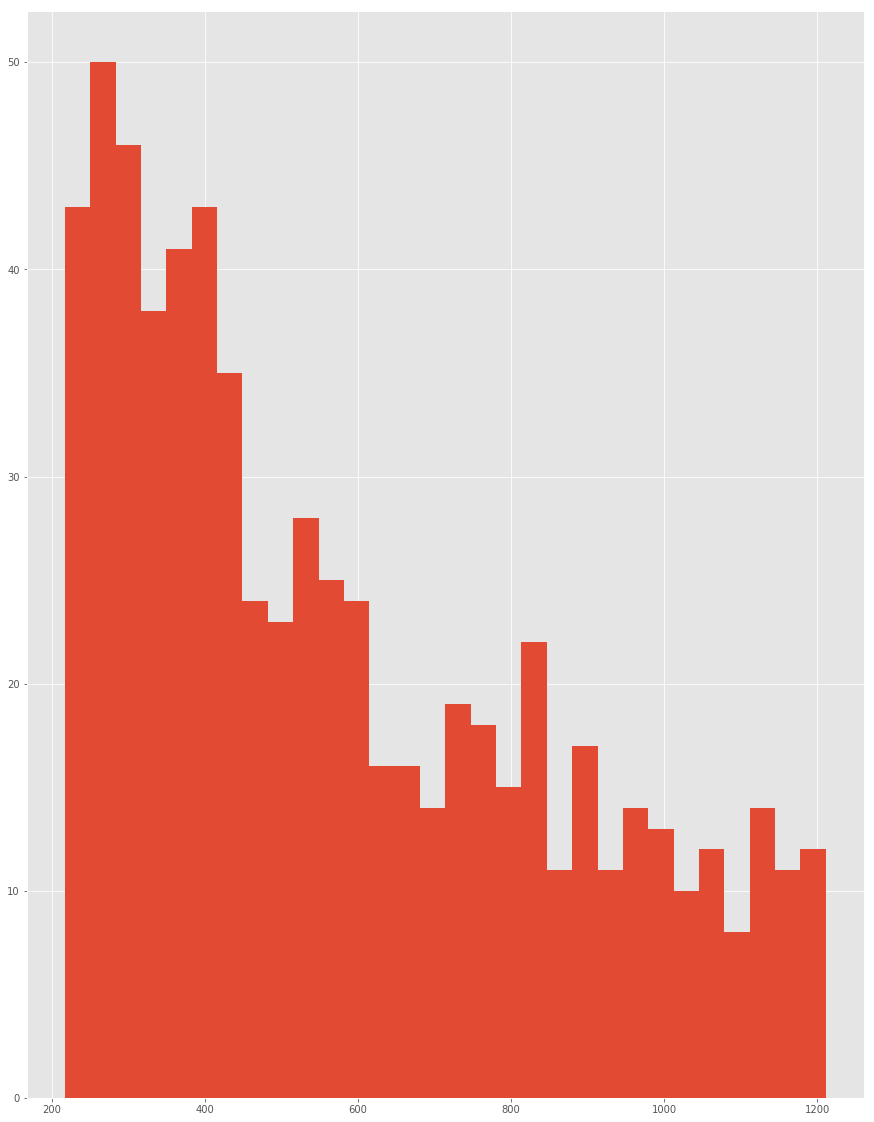

In [17]:
fig = plt.figure(figsize =(15,20))
ax = fig.gca()
p2_df = p2_df.sort_values(by=['diff'])[n1:n2]
p2_df[p2_df['diff']<int(2*median_time_p2)]['diff'].hist(bins=30,ax = ax)

Видим, что медиана из гестограммы примерно равна 380.
Будет справедливо, если взять среднее между посчитанным на всей выборке и наблюдаемым на гистаграмме.
И это будет медианное время виполнения задания. 

In [18]:
avg_ts_p2 = (median_time_p2 + 380) / 2
avg_ts_p2

diff    495.25
dtype: float64

Расчитаем оплату за задание в проекте 2

In [19]:
pay_p2 = int(avg_ts_p2 / 30 * N)
pay_p2

82

Расчитаем для всех ассесоров оплату за 2 проект

In [91]:
t2 = p2_df.groupby(['worker']).count()
t2['pay_p2'] = t2['diff'] * pay_p2
t2

,resolution_type,diff,pay_p2
worker,,,
login1,47,47,4042
login10,26,26,2236
login11,38,38,3268
login12,17,17,1462
login13,49,49,4214
login14,12,12,1032
login15,73,73,6278
login16,73,73,6278
login2,9,9,774


Расчиатем итоговую таблицу по оплате ассесорам за работу

In [95]:
t1['pay_p2'] = t2['pay_p2']
t1['sum'] = t1['pay_p1'] + t1['pay_p2']
t1[['pay_p1','pay_p2','sum']]

,pay_p1,pay_p2,sum
worker,,,
login1,10721,4042,14763
login10,5822,2236,8058
login11,20661,3268,23929
login12,13632,1462,15094
login13,19241,4214,23455
login14,5183,1032,6215
login15,11786,6278,18064
login16,33796,6278,40074
login2,1704,774,2478
